## 1. The sisters and Google Trends
<p>While I'm not a fan nor a hater of the Kardashians and Jenners, the polarizing family intrigues me. Why? Their marketing prowess. Say what you will about them and what they stand for, they are great at the hype game. Everything they touch turns to content.</p>
<p>The sisters in particular over the past decade have been especially productive in this regard. Let's get some facts straight. I consider the "sisters" to be the following daughters of Kris Jenner. Three from her first marriage to lawyer <a href="https://en.wikipedia.org/wiki/Robert_Kardashian">Robert Kardashian</a>:</p>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Kourtney_Kardashian">Kourtney Kardashian</a> (daughter of Robert Kardashian, born in 1979)</li>
<li><a href="https://en.wikipedia.org/wiki/Kim_Kardashian">Kim Kardashian</a> (daughter of Robert Kardashian, born in 1980)</li>
<li><a href="https://en.wikipedia.org/wiki/Khlo%C3%A9_Kardashian">Khloé Kardashian</a> (daughter of Robert Kardashian, born in 1984)</li>
</ul>
<p>And two from her second marriage to Olympic gold medal-winning decathlete, <a href="https://en.wikipedia.org/wiki/Caitlyn_Jenner">Caitlyn Jenner</a> (formerly Bruce):</p>
<ul>
<li><a href="https://en.wikipedia.org/wiki/Kendall_Jenner">Kendall Jenner</a> (daughter of Caitlyn Jenner, born in 1995)</li>
<li><a href="https://en.wikipedia.org/wiki/Kylie_Jenner">Kylie Jenner</a> (daughter of Caitlyn Jenner, born in 1997)</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_538/img/kardashian_jenner_family_tree.png" alt="Kardashian Jenner sisters family tree"></p>
<p>This family tree can be confusing, but we aren't here to explain it. We're here to explore the data underneath the hype, and we'll do it using search interest data from Google Trends. We'll recreate the Google Trends plot to visualize their ups and downs over time, then make a few custom plots of our own. And we'll answer the big question: <strong>is Kim even the most famous sister anymore?</strong></p>
<p>First, let's load and inspect our Google Trends data, which was downloaded in CSV form. The <a href="https://trends.google.com/trends/explore?date=2007-01-01%202019-03-21&q=%2Fm%2F0261x8t,%2Fm%2F043p2f2,%2Fm%2F043ttm7,%2Fm%2F05_5_yx,%2Fm%2F05_5_yh">query</a> parameters: each of the sisters, worldwide search data, 2007 to present day. (2007 was the year Kim became "active" according to Wikipedia.)</p>

In [26]:
# Load pandas
import pandas as pd

# Read in dataset
trends = pd.read_csv("datasets/trends_kj_sisters.csv")

# Inspect data
trends.head()

,Month,Kim Kardashian: (Worldwide),Khloé Kardashian: (Worldwide),Kourtney Kardashian: (Worldwide),Kendall Jenner: (Worldwide),Kylie Jenner: (Worldwide)
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


## 2. Better "kolumn" names
<p>So we have a column for each month since January 2007 and a column for the worldwide search interest for each of the sisters each month. By the way, Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Okay, that's great Google, but you are not making this data easily analyzable for us. I see a few things. Let's do the column names first. A column named "Kim Kardashian: (Worldwide)" is not the most usable for coding purposes. Let's shorten those so we can access their values better. Might as well standardize all column formats, too. I like lowercase, short column names.</p>

In [28]:
# Make column names easier to work with
trends.columns = ['month','kim', 'khloe', 'kourtney', 'kendall', 'kylie']
print(trends.columns)
# Inspect data
trends.head()

Index(['month', 'kim', 'khloe', 'kourtney', 'kendall', 'kylie'], dtype='object')


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,<1,<1,<1,2
1,2007-02,12,<1,<1,<1,2
2,2007-03,9,<1,<1,<1,1
3,2007-04,6,<1,<1,<1,1
4,2007-05,6,<1,<1,<1,2


## 3. Pesky data types
<p>That's better. We don't need to scroll our eyes across the table to read the values anymore since it is much less wide. And seeing five columns that all start with the letter "k" … the aesthetics … we should call them "kolumns" now! (Bad joke.)</p>
<p>The next thing I see that is going to be an issue is that "&lt;" sign. If <em>"a score of 0 means there was not enough data for this term,"</em> "&lt;1" must mean it is between 0 and 1 and Google does not want to give us the fraction from google.trends.com for whatever reason. That's fine, but this "&lt;" sign means we won't be able to analyze or visualize our data right away because those column values aren't going to be represented as numbers in our data structure. Let's confirm that by inspecting our data types.</p>

In [30]:
# Inspect data types
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null object
kim         147 non-null int64
khloe       147 non-null object
kourtney    147 non-null object
kendall     147 non-null object
kylie       147 non-null int64
dtypes: int64(2), object(4)
memory usage: 7.0+ KB


## 4. From object to integer
<p>Yes, okay, the <code>khloe</code>, <code>kourtney</code>, and <code>kendall</code> columns aren't integers like the <code>kim</code> and <code>kylie</code> columns are. Again, because of the "&lt;" sign that indicates a search interest value between zero and one. Is this an early hint at the hierarchy of sister popularity? We'll see shortly. Before that, we'll need to remove that pesky "&lt;" sign. Then we can change the type of those columns to integer.</p>

In [32]:
# Loop through columns
for i in trends.columns:
    # Only modify columns that have the "<" sign
    if "<" in trends[i].to_string():
        # Remove "<" and convert dtype to integer
        trends[i] = trends[i].str.replace("<", "")
        trends[i] = pd.to_numeric(trends[i])

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null object
kim         147 non-null int64
khloe       147 non-null int64
kourtney    147 non-null int64
kendall     147 non-null int64
kylie       147 non-null int64
dtypes: int64(5), object(1)
memory usage: 7.0+ KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01,2,1,1,1,2
1,2007-02,12,1,1,1,2
2,2007-03,9,1,1,1,1
3,2007-04,6,1,1,1,1
4,2007-05,6,1,1,1,2


## 5. From object to datetime
<p>Okay, great, no more "&lt;" signs. All the sister columns are of integer type.</p>
<p>Now let's convert our <code>month</code> column from type object to datetime to make our date data more accessible.</p>

In [34]:
# Convert month to type datetime
trends['month'] = pd.to_datetime(trends['month'])

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
month       147 non-null datetime64[ns]
kim         147 non-null int64
khloe       147 non-null int64
kourtney    147 non-null int64
kendall     147 non-null int64
kylie       147 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.0 KB


,month,kim,khloe,kourtney,kendall,kylie
0,2007-01-01,2,1,1,1,2
1,2007-02-01,12,1,1,1,2
2,2007-03-01,9,1,1,1,1
3,2007-04-01,6,1,1,1,1
4,2007-05-01,6,1,1,1,2


## 6. Set month as index
<p>And finally, let's set the <code>month</code> column as our index to wrap our data cleaning. Having <code>month</code> as index rather than the zero-based row numbers will allow us to write shorter lines of code to create plots, where <code>month</code> will represent our x-axis.</p>

In [36]:
# Set month as DataFrame index
trends = trends.set_index('month')

# Inspect the data
trends.head()

,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,2,1,1,1,2
2007-02-01,12,1,1,1,2
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,2


## 7. The early Kim hype
<p>Okay! So our data is ready to plot. Because we cleaned our data, we only need one line of code (and just <em>thirteen</em> characters!) to remake the Google Trends chart, plus another line to make the plot show up in our notebook.</p>

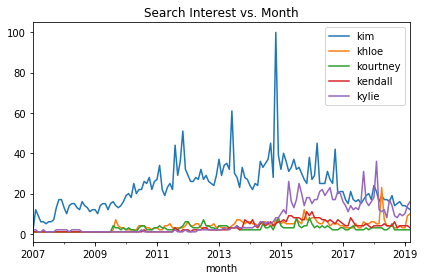

In [38]:
# Plot search interest vs. month

# Make plots show in the notebook and stored in the notebook document
%matplotlib inline
trends.plot(title='Search Interest vs. Month')

## 8. Kylie's rise
<p>Oh my! There is so much to make sense of here. Kim's <a href="https://en.wikipedia.org/wiki/Kim_Kardashian#2007%E2%80%932009:_Breakthrough_with_reality_television">sharp rise in 2007</a>, with the beginning of <a href="https://en.wikipedia.org/wiki/Keeping_Up_with_the_Kardashians"><em>Keeping Up with the Kardashians</em></a>, among other things. There was no significant search interest for the other four sisters until mid-2009 when Kourtney and Khloé launched the reality television series, <a href="https://en.wikipedia.org/wiki/Kourtney_and_Kim_Take_Miami"><em>Kourtney and Khloé Take Miami</em></a>. Then there was Kim's rise from famous to <a href="https://trends.google.com/trends/explore?date=all&geo=US&q=%2Fm%2F0261x8t,%2Fm%2F0d05l6">literally more famous than God</a> in 2011. This Cosmopolitan <a href="https://www.cosmopolitan.com/uk/entertainment/a12464842/who-is-kim-kardashian/">article</a> covers the timeline that includes the launch of music videos, fragrances,  iPhone and Android games, another television series, joining Instagram, and more. Then there was Kim's ridiculous spike in December 2014: posing naked on the cover of Paper Magazine in a bid to break the internet will do that for you.</p>
<p>A curious thing starts to happen after that bid as well. Let's zoom in…</p>

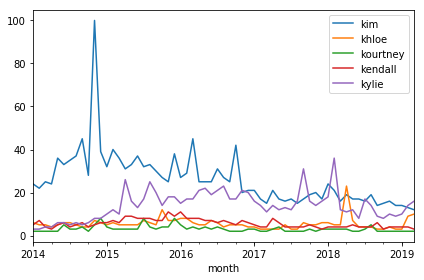

In [40]:
# Zoom in from Januaary 2014
trends.loc['2014-01-01':].plot()

## 9. Smooth out the fluctuations with rolling means
<p>It looks like my suspicion may be true: Kim is not always the most searched Kardashian or Jenner sister. Since late-2016, at various months, Kylie overtakes Kim. Two big spikes where she smashed Kim's search interest: in September 2017 when it was reported that Kylie was expecting her first child with rapper <a href="https://en.wikipedia.org/wiki/Travis_Scott">Travis Scott</a> and in February 2018 when she gave birth to her daughter, Stormi Webster. The continued success of Kylie Cosmetics has kept her in the news, not to mention making her the "The Youngest Self-Made Billionaire Ever" <a href="https://www.forbes.com/sites/natalierobehmed/2019/03/05/at-21-kylie-jenner-becomes-the-youngest-self-made-billionaire-ever/#57e612c02794">according to Forbes</a>.</p>
<p>These fluctuations are descriptive but do not really help us answer our question: is Kim even the most famous sister anymore? We can use rolling means to smooth out short-term fluctuations in time series data and highlight long-term trends. Let's make the window twelve months a.k.a. one year.</p>

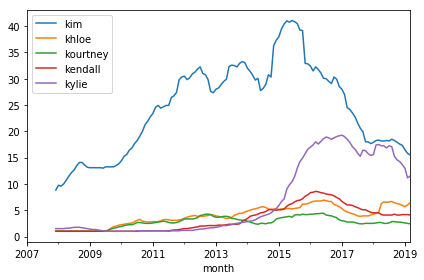

In [42]:
# Smooth the data with rolling means(moving avg)
trends.rolling(window=12).mean().plot()


## 10. Who's more famous? The Kardashians or the Jenners?
<p>Whoa, okay! So by this metric, Kim is still the most famous sister despite Kylie being close and nearly taking her crown. Honestly, the biggest takeaway from this whole exercise might be Kendall not showing up that much. It makes sense, though, despite her <a href="http://time.com/money/5033357/kendall-jenner-makes-more-than-gisele-bundchen/">wildly successful modeling career</a>. Some have called her "<a href="https://www.nickiswift.com/5681/kendall-jenner-normal-one-family/">the only normal one in her family</a>" as she tends to shy away from the more dramatic and controversial parts of the media limelight that generate oh so many clicks.</p>
<p>Let's end this analysis with one last plot. In it, we will plot (pun!) the Kardashian sisters against the Jenner sisters to see which family line is more popular now. We will use average search interest to make things fair, i.e., total search interest divided by the number of sisters in the family line.</p>
<p><strong>The answer?</strong> Since 2015, it has been a toss-up. And in the future? With this family and their penchant for big events, who knows?</p>

In [ ]:
# Average search interest for each family line
trends['kardashian'] =(trends['kim'] + trends['khloe'] + trends['kourtney']) / 3
trends['jenner'] =(trends['kendall'] + trends['kylie']) / 2

# Plot average family line search interest vs. month
trends[['kardashian', 'jenner']].plot()